In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import re

In [2]:
pos_df = pd.read_csv("230622_202641pos_sunscreen.csv",encoding="cp949")


In [3]:
text=''
review=[]
for each_review in pos_df['리뷰']:
    each_review = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", each_review)
    review.append(each_review)

In [4]:
pos_df = pos_df.drop(['리뷰'], axis=1)
pos_df['review'] = review
pos_df

,상품이름,유저 ID,유저평점,review
0,김정문알로에 큐어 알로에 수딩젤 리뉴얼 150ml 1+1기획,소보르빵,5,몸에 땀띠가 나서 구입했는데냉장고에 넣고 사용하니 너무 시원하고 쿨링감도 오래가서 좋네요
1,김정문알로에 큐어 알로에 수딩젤 리뉴얼 150ml 1+1기획,Haneulmotd,5,피부에 열감이 오르는 여름에 사용하기 너무 좋아요화장 전 사용해도 때처럼 밀리지 않...
2,김정문알로에 큐어 알로에 수딩젤 리뉴얼 150ml 1+1기획,스트로베리베리베리,5,김정문 알로에 제품 유명하죠 올리브영에 언제 생긴 진 모르겠지만 궁금해서 샀습니다 ...
3,김정문알로에 큐어 알로에 수딩젤 리뉴얼 150ml 1+1기획,멘탈짱짱,5,빠른 진정이 필요할 땐 알로에겔 듬뿍 올려주면 수면팩처럼 사용 가능해요
4,김정문알로에 큐어 알로에 수딩젤 리뉴얼 150ml 1+1기획,쇼꿍,5,알로에 젤이 좋은건 알고 있었는데 김정문 알로에는 처음알았는데 유명하더라구요 이거 ...
...,...,...,...,...
95,김정문알로에 큐어 알로에 수딩젤 리뉴얼 150ml 1+1기획,꼬물꼬물e,5,쫀득쫀득한 김정문 알로에 내돈내산 한달 후 후기입니다 저는 건성피부이기 때문에 년 ...
96,김정문알로에 큐어 알로에 수딩젤 리뉴얼 150ml 1+1기획,꼬물꼬물e,5,쫀득쫀득한 김정문 알로에 내돈내산 후기입니다 우선 저는 건성피부를 가졌기 때문에 년...
97,김정문알로에 큐어 알로에 수딩젤 리뉴얼 150ml 1+1기획,계란투라이,4,김정문 알로에젤이 계속 광고로 뜨기도 했고 엄마도 어디서 들으셨는지 좋다했다고 한번...
98,김정문알로에 큐어 알로에 수딩젤 리뉴얼 150ml 1+1기획,계란투라이,4,김정문 알로에젤이 계속 광고로 뜨기도 했고 엄마도 어디서 들으셨는지 좋다했다고 한번...


In [5]:
from konlpy.tag import Mecab
import pandas as pd
import matplotlib as mpl
from gensim.models import Word2Vec
import numpy as np
from konlpy.tag import Okt
okt = Okt()
# okt.nouns(pos_df['review'][0])
pos_keywords_list=[]
for i in range(0,len(pos_df['review'])):
    okt = Okt()
    pos_keyword = okt.nouns(pos_df['review'][i])
    
    pos_keywords_list.extend(pos_keyword)

In [6]:
len(pos_keywords_list)

1347

In [7]:
df_word_count = pd.DataFrame()
word_cloud_dict = {}

word_list = list(set(pos_keywords_list))
word_cnt_list = []

In [8]:
from tqdm import tqdm
word_list_1=[]
i=0
for word in tqdm(word_list):
    
    
    if len(word) != 1:
        word_list_1.append(word)

        word_cnt = pos_keywords_list.count(word)
        word_cnt_list.append(word_cnt)
        word_cloud_dict[word] = word_cnt
        i+=1
    else:
        pass

100%|█████████████████████████████████████████████████████████████████████████████| 446/446 [00:00<00:00, 33536.39it/s]


In [12]:
df_word_count['word'] = word_list_1
df_word_count['word_cnt'] =  word_cnt_list
df_word_count = df_word_count.sort_values('word_cnt',ascending=False)
df_word_count.head(30)



,word,word_cnt
220,알로,71
22,피부,37
105,제품,36
15,진정,36
262,김정문,33
195,사용,32
179,구매,28
136,여름,22
94,얼굴,16
211,자극,16


In [45]:
import matplotlib.font_manager as fm
font_path = "C:/Users/won/Desktop/hangul_font.py"

fontprop = fm.FontProperties(fname=font_path, size=18)


In [46]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', font_path = font_path) 
wordcloud.generate_from_frequencies(word_cloud_dict)

OSError: unknown file format

In [15]:
! pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 9.5 MB/s eta 0:00:00


In [38]:
import matplotlib.pyplot as plt
word_cloud_array = word_cloud.to_array()
word_cloud_array.shape

(600, 1000, 3)

(-0.5, 999.5, 599.5, -0.5)

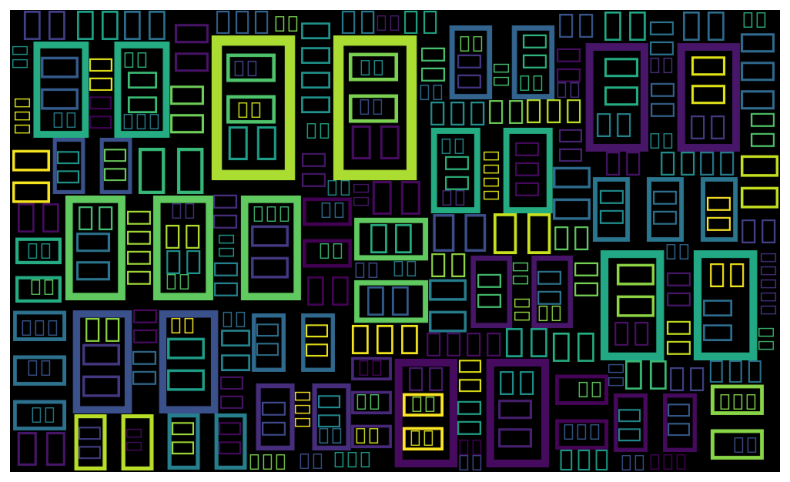

In [39]:
plt.figure(figsize=(12,6))
plt.imshow(word_cloud_array)
plt.axis('off')

In [13]:
# from sklearn.feature_extraction.text import CountVectorizer
# #키워드 길이 지정
# n_gram_range = (1,1)



# a = len(review)

# token_review_list = []
# for i in range(0,a):
#     review_vectorized = CountVectorizer(ngram_range = n_gram_range).fit([review[i]])
#     token_review = review_vectorized.get_feature_names()
    
#     token_review_list.append(token_review)
# pos_df['review_count'] = token_review_list
    